In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

#fit and normalize the data
normalized_data = scaler.fit_transform(market_data_df)



In [5]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(normalized_data, columns=market_data_df.columns, index=market_data_df.index)

 # Copy the crypto names from the original data
Crypto_name = market_data_df.index.tolist()

# Set the coinid column as index
scaled_df('market_data_df').index()

# Display sample data
display(scaled_df.head())

TypeError: 'DataFrame' object is not callable

### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
K_Values = list(range(1,11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in K_Values:
    KMeans_model = KMeans(n_clusters=k)
    KMeans_model.fit(scaled_df)
    inertia_values.append(KMeans_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'K_Values': K_Values, 'Inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
display(elbow_df)

,K_Values,Inertia
0,1,287.000000
1,2,232.054230
2,3,145.635748
3,4,106.363222
4,5,70.299177
5,6,52.888518
6,7,45.698983
7,8,37.527740
8,9,33.021309
9,10,29.340356


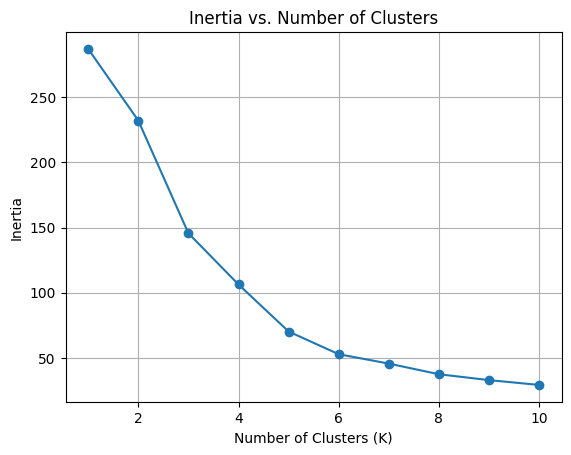

In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
K_Values =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Inertia = [287.0, 232.05423, 145.635748, 106.363222, 70.299177, 52.888518, 45.698983, 37.52774, 33.021309, 29.340356]

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Best value is 1.5 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [ ]:
# Initialize the K-Means model using the best value for k
best_k =4
KMeans_model = KMeans(n_clusters=best_k)
KMeans_model.fit(scaled_df)
cluster_labels = KMeans_model.labels_
print(cluster_labels) 

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [ ]:
# Fit the K-Means model using the scaled data
KMeans_model.fit(scaled_df)

KMeans(n_clusters=4)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = KMeans_model.predict(scaled_df)

# View the resulting array of cluster values.
print(cluster_predictions)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [ ]:
# Create a copy of the DataFrame
cluster_predictions = KMeans_model.predict(scaled_df)
print(cluster_predictions)
scaled_df_copy = scaled_df.copy()


[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [ ]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_copy['Cluster'] = cluster_predictions

# Display sample data
print(scaled_df_copy.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

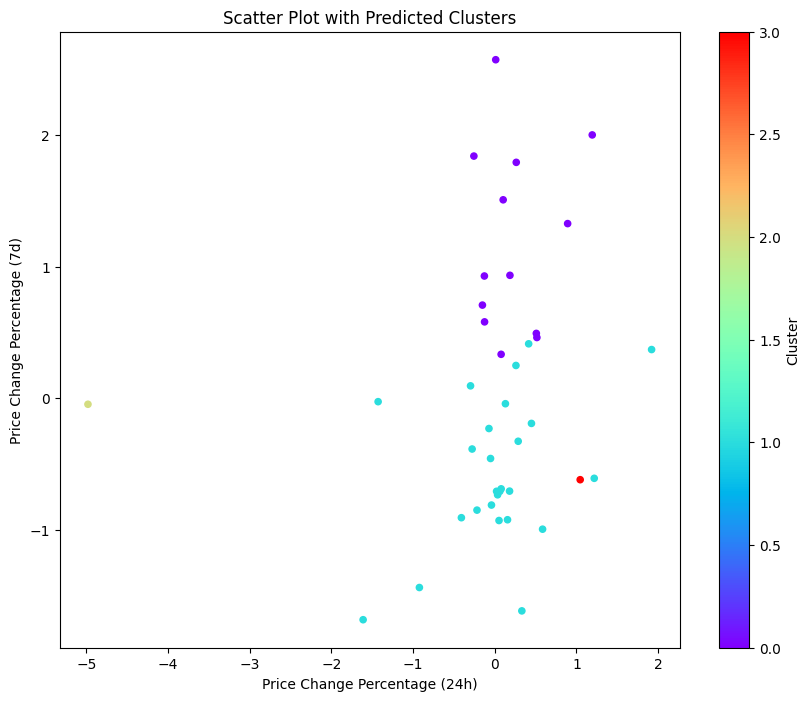

In [ ]:
# Assuming scaled_df_copy contains your DataFrame with the predicted clusters

# Create a scatter plot
scatter_plot = scaled_df_copy.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c='Cluster', colormap='rainbow', figsize=(10, 8))
scatter_plot.set_xlabel("Price Change Percentage (24h)")
scatter_plot.set_ylabel("Price Change Percentage (7d)")
scatter_plot.set_title("Scatter Plot with Predicted Clusters")

# Show the plot
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [ ]:

from sklearn.decomposition import PCA

# Create a PCA model instance with n_components=3
pca_model = PCA(n_components=3)

# Fit the PCA model to your data (assuming scaled_df_copy contains your data)
pca_model.fit(scaled_df_copy)

# Get the transformed data using the PCA model
transformed_data = pca_model.transform(scaled_df_copy)

# Print the shape of the transformed data to check
print(transformed_data.shape)


(41, 3)


In [ ]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
transformed_data = pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
print(transformed_data.shape)

(41, 3)


In [ ]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Components {i+1}: {ratio:.4f}")

Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760

Cumulative Explained Variance:
Components 1: 0.3720
Components 2: 0.7190
Components 3: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  Total 1.986

In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

pca_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Copy the crypto names from the original data
crypto_names = scaled_df.index.tolist()

# Set the coinid column as index (assuming 'coinid' is your index column)
pca_df.index.name = 'coinid'  # Set the index name
pca_df.reset_index(inplace=True)  # Reset the index temporarily to add 'coinid' column
pca_df['coinid'] = crypto_names  # Add the 'coinid' column back
pca_df.set_index('coinid', inplace=True)  # Set 'coinid' as index

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coinid                                    
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
K_Values= list(range(1,11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in K_Values:
    KMeans_model = KMeans(n_clusters=k)
    KMeans_model.fit(pca_df)
    inertia_values.append(KMeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_df = pd.DataFrame({'K_Values': K_Values, 'Inertia': inertia_values})

# Create a DataFrame with the data to plot the Elbow curve
print(elbow_df)

# Display the DataFrame


   K_Values     Inertia
0         1  256.874086
1         2  207.660442
2         3  115.918077
3         4   49.665497
4         5   38.352251
5         6   31.936158
6         7   21.276670
7         8   20.196250
8         9   14.264855
9        10   10.559358


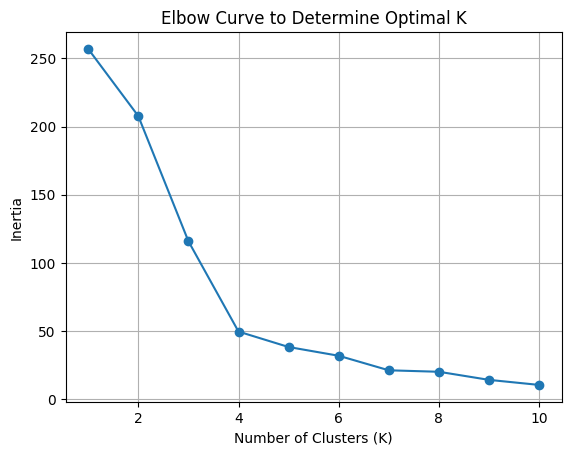

In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['K_Values'], elbow_df['Inertia'], marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to Determine Optimal K')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 1.5 between 1 and 2 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  YES

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=best_k)

In [ ]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

KMeans(n_clusters=4)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_predictions = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values.
print(cluster_predictions)


[1 1 2 2 1 1 1 1 1 2 2 2 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 3 1 2 2 0
 2 2 2 2]


In [ ]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = cluster_predictions

# Display sample data
print(pca_df_copy.head())

                   PC1       PC2       PC3  cluster
coinid                                             
bitcoin      -0.600667  0.842760  0.461595        1
ethereum     -0.458261  0.458466  0.952877        1
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        1


In [ ]:
import hvplot.pandas
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_df_copy.hvplot.scatter(x='PCA1', y='PCA2', c='Cluster', colormap='viridis', hover_cols=['Cluster'])

ModuleNotFoundError: No module named 'hvplot'

### Determine the Weights of Each Feature on each Principal Component

In [6]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_scaled.columns)
pca_component_weights

NameError: name 'pca' is not defined

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PCA1: price change 200d and change 60d 
PCA2: Price change 30D, Pirce 14 D and price 60d 
PCA3: Change 7D, Price change 14D have a strong postive influence.
    